## Project Description:
The data in the following project contains the transaction history of an online store that sells household goods which will be analyzed focusing on the products sold.

## Project Goal:
Analyzing and learning the data in order to provide meaningful insights regarding profitablity and popularity of products sold in the store.



## Project plan:
#### Data preprocessing:
    * Data Preparation 
    * Open the data and read general information
    * Rename column names and change datatypes
    * Process and study values in invoice and stock identifiers 
    * Process missing values
    * Process duplicate data
#### Exploratory Data Analysis:
    * Study variable metrics and visualize them 
    * Learn the relationship between the variables
    * Study sales over time
    * Identify most selling products and least-selling products
    * Identify products that are being repurchased by customers
    * Identify products that are being co-purchased 
#### Test hypotheses:
    * Difference in average order size between orders made on weekends compared to those made on weekdays
    * Difference in average purchase size between orders made on weekends compared to those made on weekdays
    * Difference in daily revenue between weekends compared to weekdays
    * Difference in profitability between seasonal products and products sold along the year
    * Difference in average price per item between best selling and least selling items
    * Difference in average price per item between most and least profitable items
#### Conclusions:
    * Summary and recommendations

## Preparing Data:  <a id='start'></a>

In [1]:
#!pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
except:
    data = pd.read_csv('C:/Users/NELLY/Desktop/ecommerce_dataset_us.csv', sep='\t')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


The data consists of the following columns:
`InvoiceNo` — order identifier
`StockCode` — item identifier
`Description` — item name
`Quantity` - 
`InvoiceDate` — order date
`UnitPrice` — price per item
`CustomerID` - customer identifier

There are missing values in Description and CustomerID columns.
First, we will change column names to lower case, and change invoiceDate to date type.

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data['invoicedate'] = pd.to_datetime(data['invoicedate'])


In [8]:
data.describe(include='all')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000
unique,25900,4070,4223,NaN,23260,NaN,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2019-10-29 14:41:00,NaN,NaN
freq,1114,2313,2369,NaN,1114,NaN,NaN
first,NaN,NaN,NaN,NaN,2018-11-29 08:26:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-07 12:50:00,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000


The data includes 25,900 unique orders, there is one order - no. 573585 which includes 1114 different products.
Although there are 4,070 unique items according to the stock code, there are 4,223 descriptions - implying that there is a gap between these variables that later we'll try to look into.
The average quantity of item in order is 9 items, but the median is only 3 - seems like the average value is affected by the high minimum and maximum vales (-80995, 80995 respectively).
The orders were placed between 29/11/2018 and 07/12/2019, which is a year and a week.
The average price per item is 4.6 and the median is 2.1, here too we see extreme values in minimum price (-11062) and maximum price (38970).


Since `stockcode` and `invoiceno` are object types that means that beside the numbers there are letters - first we'll try to understand if te letters have a meaning that could divide the items into groups.

In [9]:
data['invoice_code']=data['invoiceno'].str.extract('([A-Za-z]+)', expand=False)


In [10]:
data.invoice_code.unique()

array([nan, 'C', 'A'], dtype=object)

In [11]:
data.groupby('invoice_code')['stockcode'].count()

invoice_code
A       3
C    9288
Name: stockcode, dtype: int64

There are only two letters in `invoicecode` column - A and C, A repeats only in three invoice codes while C repeats almost 1,0000 times. All the rest do not include any letter. We will try to understand what 'A' and 'C' represent

In [12]:
data.query('invoice_code=="A"')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN,A
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN,A
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN,A


Seems like all three invoices including the letter 'A' happend in the same date within few minutes and represent an attempt to reduce sum of -11062 USD which was done badly at first and then needed to cancel it and finaly was done as expected. The missing `customerid` value and the short `stockcode` support this proposal.

In [13]:
data.query('invoice_code=="C"')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0,C
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0,C
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0,C
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,C
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,C
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0,C
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0,C
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0,C
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0,C


In [14]:
data.query('invoice_code=="C"').describe(include='all')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code
count,9288,9288,9288,9288.000000,9288,9288.000000,8905.000000,9288
unique,3836,1947,1972,NaN,3766,NaN,NaN,1
top,C570867,M,Manual,NaN,2019-10-10 16:17:00,NaN,NaN,C
freq,101,244,244,NaN,101,NaN,NaN,9288
first,NaN,NaN,NaN,NaN,2018-11-29 09:41:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-07 11:58:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,-29.885228,NaN,48.393661,14991.667266,NaN
std,NaN,NaN,NaN,1145.786965,NaN,666.600430,1706.772357,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.010000,12346.000000,NaN
25%,NaN,NaN,NaN,-6.000000,NaN,1.450000,13510.000000,NaN


In [15]:
data.query('invoice_code=="C"').customerid.isna().sum()

383

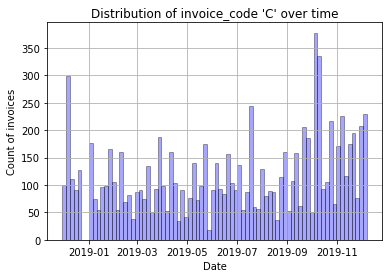

In [16]:
data.loc[data['invoice_code']=='C','invoicedate'].hist(bins=80, color='blue',  edgecolor='k', alpha=0.35)
plt.title("Distribution of invoice_code 'C' over time")
plt.ylabel('Count of invoices')
plt.xlabel('Date')
plt.show()

When the `invoiceno` includes the letter 'C' we see variation - these invoices completed in different dates, for different customers and included different items and prices. What is interesting is the fact that the quantity metrics are all negative - meaning that all items included in these invoices were with negative quantity values, we suggest that these invoices represent situations of returning items that were bought earlier, or some discount.
Next we will investigate the letters in `stockcode` variable

In [17]:
data['stock_code']=data['stockcode'].str.extract('([A-Za-z]+)', expand=True)
data['stock_num']=data['stockcode'].str.extract('(\d+)', expand=True)
data['stock_num']=pd.to_numeric(data['stock_num']).astype('Int64')

In [18]:
data.stock_code.isna().sum()

487036

In [19]:
data.groupby('stock_code')['stockcode'].count().sort_values()

stock_code
GR               1
LP               1
m                1
PADS             4
O                5
Y                8
k               10
Z               10
DCGSSBOY        11
I               13
DCGSSGIRL       13
CRUK            16
T               17
DCGS            21
p               26
f               29
gift            34
AMAZONFEE       34
BANK            37
V               52
g               60
bl              62
n               84
R               90
s               93
e              100
l              113
U              166
d              180
W              192
J              222
c              231
BL             326
H              380
b              412
K              429
a              542
N              611
DOT            710
P              768
M             1022
POST          1256
G             1493
S             1726
F             1973
E             2199
L             2277
D             3705
C             6625
A            12680
B            13803
Name: stockcode, dty

First, we see many different letters and words - there are letters the repeat themselves in upper and lower case - we will check if it is an error and they represent the same items.
next, we will try to see if there are letters or words that represent the same category.

In [20]:
def compare_groups(data, code_lower, code_upper):
    group_lower = set(data.query(f'stock_code =="{code_lower}"')['description'].unique())
    group_upper = set(data.query(f'stock_code=="{code_upper}"')['description'].unique())
    
    if group_lower.issubset(group_upper):
        print(f"All unique items in group {code_lower} appear in group {code_upper}.")
    else:
        not_in_upper = group_lower.difference(group_upper)
        count_not_in_upper = len(not_in_upper)
        count_lower_total=data.query(f'stock_code =="{code_lower}"')['description'].nunique()
        print(f"{round(count_not_in_upper/count_lower_total,2)} of the unique items in group {code_lower} do not appear in group {code_upper}.")



In [21]:
compare_groups(data, 'a', 'A')
compare_groups(data, 'b', 'B')
compare_groups(data, 'c', 'C')
compare_groups(data, 'd', 'D')
compare_groups(data, 'e', 'E')
compare_groups(data, 'f', 'F')
compare_groups(data, 'g', 'G')
compare_groups(data, 'k', 'K')
compare_groups(data, 'l', 'L')
compare_groups(data, 'm', 'M')
compare_groups(data, 'n', 'N')
compare_groups(data, 'p', 'P')
compare_groups(data, 's', 'S')
compare_groups(data, 'bl', 'BL')


All unique items in group a appear in group A.
0.03 of the unique items in group b do not appear in group B.
All unique items in group c appear in group C.
All unique items in group d appear in group D.
All unique items in group e appear in group E.
All unique items in group f appear in group F.
All unique items in group g appear in group G.
All unique items in group k appear in group K.
0.25 of the unique items in group l do not appear in group L.
All unique items in group m appear in group M.
All unique items in group n appear in group N.
All unique items in group p appear in group P.
All unique items in group s appear in group S.
All unique items in group bl appear in group BL.


In [22]:
set(data.query('stock_code=="l"')['description'].unique())

{'BISCUITS SMALL BOWL LIGHT BLUE',
 'LARGE HEART FLOWERS HOOK   ',
 'SINGLE HEART ZINC T-LIGHT HOLDER',
 'WOODEN FRAME ANTIQUE WHITE '}

We learn that almost in all cases the unique items that assigned to lower case letters appear in the upper case code letters. 
In the only two cases that there is no perfect match the share of not matching items is small or their absolute number is small - Based on this information we will change the `stock_code` letters to upper case. 

In [23]:
data['stock_code'] = data['stock_code'].str.upper()

In [24]:
most_frequent_per_category = data.groupby('stock_code')['description'].apply(lambda x: x.value_counts().idxmax()).sort_values()
print(most_frequent_per_category)

stock_code
AMAZONFEE                             AMAZON FEE
DCGSSBOY                          BOYS PARTY BAG
BANK                                Bank Charges
CRUK                             CRUK Commission
DOT                               DOTCOM POSTAGE
GIFT          Dotcomgiftshop Gift Voucher £20.00
BL                       EDWARDIAN PARASOL BLACK
N                      EDWARDIAN PARASOL NATURAL
K                  ENGLISH ROSE GARDEN SECATEURS
DCGSSGIRL                        GIRLS PARTY BAG
S              HANGING HEART ZINC T-LIGHT HOLDER
C                 JUMBO  BAG BAROQUE BLACK WHITE
B                        JUMBO BAG RED RETROSPOT
F                           JUMBO BAG STRAWBERRY
G            KNITTED UNION FLAG HOT WATER BOTTLE
I                      LETTER "I" BLING KEY RING
O                      LETTER "O" BLING KEY RING
T                      LETTER "T" BLING KEY RING
Y                      LETTER "Y" BLING KEY RING
Z                      LETTER "Z" BLING KEY RING
M        

In [25]:
data.query('stock_code=="GR" or stock_code=="LP"')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num
431377,573592,79323GR,"Unsaleable, destroyed.",-1158,2019-10-29 15:16:00,0.0,NaN,NaN,GR,79323
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2019-10-29 15:16:00,0.0,NaN,NaN,LP,79323


We see that it seems like the letters represent some variations in items - color, shape... while the other categories with longer names represent some other things like commissions (`CRUK`, `AMAZONFEE`, `BANK`, `DOT`, `POST`) or vouchers (`GIFT`).
Lastly - `GR` and `LP` codes seems to represent some notes regarding the condition of the items, we will change the name of the code to 'UNUSE' and later will check if there are more rows with a similar note.

In [26]:
data['stock_code'] = data['stock_code'].replace(['GR', 'LP'], 'UNUSE')

In [27]:
#updating the stockcode column with the edited letters
data['stock_code']=data['stock_code'].fillna('')
data['stockcode']=data['stock_num'].astype(str)+data['stock_code']


### Missing Values

First we will try to fill in the missing values of descriptions, based on the stockcodes.

In [28]:
#check for number of unique descriptions per code
data.groupby('stockcode')['description'].nunique().describe()

count    3953.000000
mean        1.182899
std         0.585495
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: description, dtype: float64

Since there are `stockcode` that related to more than one description, we will fill the most frequent one.

In [29]:
data['description'] = data.groupby('stockcode')['description'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [30]:
data.description.isna().value_counts()

False    541799
True        110
Name: description, dtype: int64

There are still 110 rows with missing description, we will check if these rows have any pattern:

In [31]:
data[data['description'].isna()].head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN,NaN,,21134
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN,NaN,A,85226
1988,536550,85044,NaN,1,2018-11-29 14:34:00,0.0,NaN,NaN,,85044
2024,536552,20950,NaN,1,2018-11-29 14:34:00,0.0,NaN,NaN,,20950
2026,536554,84670,NaN,23,2018-11-29 14:35:00,0.0,NaN,NaN,,84670


In [32]:
data[data['description'].isna()].describe(include='all')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num
count,110,110,0,110.000000,110,110.0,0.0,0,110,110.000000
unique,110,110,0,NaN,93,NaN,NaN,0,11,NaN
top,536995,84964B,NaN,NaN,2019-01-26 14:52:00,NaN,NaN,NaN,,NaN
freq,1,1,NaN,NaN,4,NaN,NaN,NaN,61,NaN
first,NaN,NaN,NaN,NaN,2018-11-29 14:32:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-09-17 11:01:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-8.372727,NaN,0.0,NaN,NaN,NaN,51019.372727
std,NaN,NaN,NaN,16.094822,NaN,0.0,NaN,NaN,NaN,31032.217015
min,NaN,NaN,NaN,-102.000000,NaN,0.0,NaN,NaN,NaN,55.000000
25%,NaN,NaN,NaN,-11.000000,NaN,0.0,NaN,NaN,NaN,21483.250000


In [33]:
round(data[data['description'].isna()].shape[0]/data.shape[0],2)

0.0

All the rows that are missing description are not connected to any `customerid` and all the `unitprice` values are equal to zero. Since these rows are almost zero percent of the whole data we will ommit them.

In [34]:
data = data.dropna(subset=['description']).reset_index(drop=True)

In [35]:
data['description']=data['description'].map(str.lower)

In [36]:
keywords = ['destroy', 'damage', 'unsaleable']
filt=data['description'].str.contains('|'.join(keywords), case=False)
data[filt].describe(include='all')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num
count,139,139,139,139.000000,139,139.0,0.0,0,139,139.000000
unique,139,132,18,NaN,127,NaN,NaN,0,12,NaN
top,568401,79030G,damaged,NaN,2019-05-31 11:11:00,NaN,NaN,NaN,,NaN
freq,1,2,58,NaN,3,NaN,NaN,NaN,87,NaN
first,NaN,NaN,NaN,NaN,2018-12-04 16:10:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2019-12-05 18:32:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-284.158273,NaN,0.0,NaN,NaN,NaN,49770.043165
std,NaN,NaN,NaN,626.721794,NaN,0.0,NaN,NaN,NaN,29276.779485
min,NaN,NaN,NaN,-4830.000000,NaN,0.0,NaN,NaN,NaN,10133.000000
25%,NaN,NaN,NaN,-137.500000,NaN,0.0,NaN,NaN,NaN,21941.000000


In [37]:
#checking how many rows in the filtered table includes positive quantity
data[filt].query('quantity>0')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num
344901,567131,21830,damaged,192,2019-09-14 14:13:00,0.0,NaN,NaN,,21830


We learn that there are 139 descriptions that include one of the chosen words, in all cases the price is equal to zero, there are no customers and the quantity is negative (except for one occurence). Based on this, we will change the stock code of these rows to 'UNUSE'

In [38]:
data.loc[filt, 'stock_code'] = 'UNUSE'

In [39]:
#updating again the stockcode column with the edited letters
data['stockcode']=data['stock_num'].astype(str)+data['stock_code']

In [40]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850.0,NaN,A,85123
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850.0,NaN,,71053
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850.0,NaN,B,84406
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850.0,NaN,G,84029
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850.0,NaN,E,84029


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541799 entries, 0 to 541798
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoiceno     541799 non-null  object        
 1   stockcode     541799 non-null  object        
 2   description   541799 non-null  object        
 3   quantity      541799 non-null  int64         
 4   invoicedate   541799 non-null  datetime64[ns]
 5   unitprice     541799 non-null  float64       
 6   customerid    406829 non-null  float64       
 7   invoice_code  9291 non-null    object        
 8   stock_code    541799 non-null  object        
 9   stock_num     539003 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 41.9+ MB


Next we will try to fill `customerid` missing values

In [42]:
data['customerid'] = data.groupby('invoiceno')['customerid'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541799 entries, 0 to 541798
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoiceno     541799 non-null  object        
 1   stockcode     541799 non-null  object        
 2   description   541799 non-null  object        
 3   quantity      541799 non-null  int64         
 4   invoicedate   541799 non-null  datetime64[ns]
 5   unitprice     541799 non-null  float64       
 6   customerid    406829 non-null  float64       
 7   invoice_code  9291 non-null    object        
 8   stock_code    541799 non-null  object        
 9   stock_num     539003 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 41.9+ MB


In [44]:
round(data[data['customerid'].isna()].shape[0]/data.shape[0],2)

0.25

We see that there wasn't any change in the number of missing values of `customerid` column, suggesting that these clients never signed up and created an account. We do not have any other variable that could help us fill the column, in which 25% of the values are missing, and the focus in this project is on the products being sold, so we will leave it that way.

### Duplicates

In [45]:
#dropping duplicated rows
data = data.drop_duplicates(keep='first').reset_index(drop=True)

In [46]:
data.duplicated().sum()

0

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536531 entries, 0 to 536530
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoiceno     536531 non-null  object        
 1   stockcode     536531 non-null  object        
 2   description   536531 non-null  object        
 3   quantity      536531 non-null  int64         
 4   invoicedate   536531 non-null  datetime64[ns]
 5   unitprice     536531 non-null  float64       
 6   customerid    401604 non-null  float64       
 7   invoice_code  9254 non-null    object        
 8   stock_code    536531 non-null  object        
 9   stock_num     533741 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 41.4+ MB


We ommited 5,268 duplicated rows and left with 536,531 rows in the dataset.

In this part we changed column names and data types, investigated the meaning of the letters 'A' and 'C' in `invoicecode` column, adressed anomalies in `stockcode` and then filled missing values in `description` column, filtered out 110 rows in which the description, the customerid  were missing and the unitprice was zero; and in the last stage we dropped duplicated rows.

## Exploratory Data

After cleaning and processing the data, we will investigate now two variables that are important to further analysis: `quantity` and `unitprice`.

In [48]:
def distribution_calculate(parameter):
    print('The plot of: {}'.format(parameter))
    sns.boxplot(y=data[parameter])
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    ninety_nine = np.percentile(data[parameter], 99)
    one = np.percentile(data[parameter], 1)
    print('---------------------------------------')
    print('minimun border that contains only the small 1% of the data:',one)
    print('maximum border that contains 99% of the data:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',one, "and above",ninety_nine)
    print('We have',len(data[(data[parameter]<one)|(data[parameter]>ninety_nine)]),"values that we can consider as outliers, out of ", data.shape[0],
          "values. Meaning that outliers are", round(len(data[(data[parameter]<one)|(data[parameter]>ninety_nine)])/data.shape[0],2), "of the data.")
    print('---------------------------------------')
    filter_parameter=(data[parameter]>one)&(data[parameter]<ninety_nine) #making a filter for the data without outliers
    parameter_filtered =data[filter_parameter] #filtered data without outliers in specific variable
    print(f'Accepting the cut of the extreme minimum and maximum 1% the data will contain information about {parameter_filtered.shape[0]} rows only.')
    print('The plot of filtered {}: '.format(parameter))

    sns.boxplot(y=parameter_filtered[parameter])
    plt.show()
    return filter_parameter, parameter_filtered 

The plot of: quantity


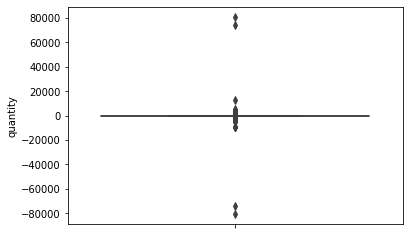

The distribution is skewed to the right
---------------------------------------
Statistics on: quantity
count    536531.000000
mean          9.623718
std         219.152347
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64
---------------------------------------
minimun border that contains only the small 1% of the data: -2.0
maximum border that contains 99% of the data: 100.0
---------------------------------------
The outliers are considered to be values below -2.0 and above 100.0
We have 9913 values that we can consider as outliers, out of  536531 values. Meaning that outliers are 0.02 of the data.
---------------------------------------
Accepting the cut of the extreme minimum and maximum 1% the data will contain information about 523419 rows only.
The plot of filtered quantity: 


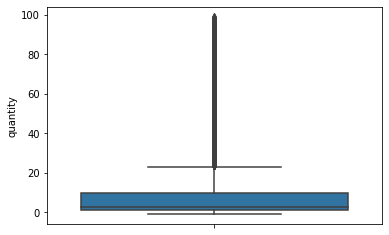

In [49]:
filtering_quantity, quantity_filtered = distribution_calculate ('quantity')

In [50]:
quantity_filtered.groupby('invoice_code')['invoiceno'].count()

invoice_code
A       3
C    4084
Name: invoiceno, dtype: int64

In [51]:
quantity_filtered.groupby('stock_code')['invoiceno'].count()

stock_code
             470463
A             12860
AMAZONFEE        34
B             13622
BANK             37
BL              382
C              6577
CRUK             16
D              3797
DCGS              9
DCGSSBOY         11
DCGSSGIRL        13
DOT             709
E              2229
F              1870
G              1507
GIFT             34
H               375
I                13
J               218
K               429
L              2304
M               957
N               684
O                 5
P               754
PADS              4
POST           1238
R                81
S              1758
T                15
U               163
UNUSE             6
V                48
W               179
Y                 8
Z                10
Name: invoiceno, dtype: int64

The percentile check of the quantity column showed that the minimum border is -2 items and the maximum border is 100 items. The filtering ommited almost half of the items marked with the letter 'C' in their invoice number, and only 6 out of 139 rows of damaged items are included and all other words that represented commissions or irrelevant notes were ommited, meaning that we filtered most of the incidents in which the row represents a non saleable item, irrelevant fee or item that was bought in a discount or returned to the store, were ommited.

The plot of: unitprice


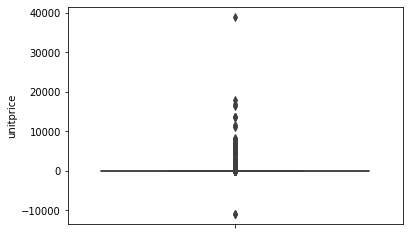

The distribution is skewed to the right
---------------------------------------
Statistics on: unitprice
count    536531.000000
mean          4.633605
std          97.243062
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unitprice, dtype: float64
---------------------------------------
minimun border that contains only the small 1% of the data: 0.19
maximum border that contains 99% of the data: 18.0
---------------------------------------
The outliers are considered to be values below 0.19 and above 18.0
We have 8303 values that we can consider as outliers, out of  536531 values. Meaning that outliers are 0.02 of the data.
---------------------------------------
Accepting the cut of the extreme minimum and maximum 1% the data will contain information about 525631 rows only.
The plot of filtered unitprice: 


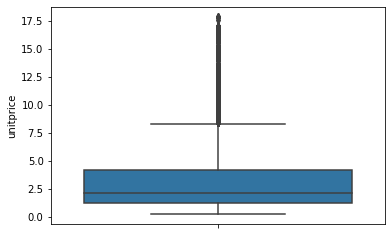

In [52]:
filtering_price, price_filtered = distribution_calculate ('unitprice')

In [53]:
price_filtered.groupby('invoice_code')['invoiceno'].count()

invoice_code
C    8774
Name: invoiceno, dtype: int64

In [54]:
price_filtered.groupby('stock_code')['invoiceno'].count()

stock_code
             474581
A             12750
AMAZONFEE         1
B             13864
BANK             11
BL              388
C              6511
CRUK              3
D              3743
DCGS              9
DCGSSBOY         11
DCGSSGIRL        13
DOT              15
E              2239
F              1930
G              1488
GIFT             17
H               376
I                13
J               219
K               432
L              2362
M               731
N               692
O                 5
P               762
POST            244
R                86
S              1731
T                15
U               165
V                23
W               183
Y                 8
Z                10
Name: invoiceno, dtype: int64

The percentile check of the price column showed that the minimum border is 0.19 USD per item and the maximum border is 18 USD per item. The filtering ommited all the items marked with the letter 'A' in their invoice number - these items represented an adjustment of a wrongly typed sum, and almost third of the items marked with 'C' which represented items that were returned or were in discount.Filtering the price left only the letters that we suggested representing regular items, thus reducing the noise that all rows that did not represent a sale added to the variable.

In [55]:
#Checking if the filtering of the quantity and price, leads to small data compared to the original data
filtered_data= pd.concat([quantity_filtered,price_filtered], axis=1, join="inner").reset_index(drop=True)
filtered_data = filtered_data.iloc[:,0:10]
print(round(filtered_data.shape[0]/data.shape[0],2))
#We still have 96% of the data so it's ok

0.96


Additionally, we decided to ommit data from not whole months so the data will include only one complete year.
we will ommit data before December 2018 and after November 2019.

In [56]:
#creating day and week variables
filtered_data['date'] = pd.to_datetime(filtered_data['invoicedate'], format='%Y-%m-%d').dt.date
filtered_data['week']=filtered_data['invoicedate'].dt.isocalendar().week
filtered_data['month'] = filtered_data['invoicedate'].dt.to_period('M')
filtered_data['year'] = filtered_data['invoicedate'].dt.year


In [57]:
filtered_data = filtered_data[(filtered_data['invoicedate'] >= "2018-12-01") & (filtered_data['invoicedate'] < "2019-12-01")]

In [58]:
filtered_data.shape[0]

490421

In [59]:
filtered_data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num,date,week,month,year
4946,536847,22155,star decoration rustic,48,2018-12-01 09:31:00,0.42,17135.0,NaN,,22155,2018-12-01,48,2018-12,2018
4947,536847,21807,white christmas star decoration,36,2018-12-01 09:31:00,0.42,17135.0,NaN,,21807,2018-12-01,48,2018-12,2018
4948,536847,22161,heart decoration rustic hanging,24,2018-12-01 09:31:00,0.65,17135.0,NaN,,22161,2018-12-01,48,2018-12,2018
4949,536847,22065,christmas pudding trinket pot,24,2018-12-01 09:31:00,1.45,17135.0,NaN,,22065,2018-12-01,48,2018-12,2018
4950,536847,20956,porcelain t-light holders assorted,12,2018-12-01 09:31:00,1.25,17135.0,NaN,,20956,2018-12-01,48,2018-12,2018


In [60]:
filtered_data.describe()

,quantity,unitprice,customerid,stock_num,week,year
count,490421.000000,490421.000000,368805.000000,489838.000000,490421.000000,490421.000000
mean,7.581260,3.153611,15287.247567,31510.922217,29.966186,2018.928054
std,11.224085,2.966785,1709.434370,21467.418269,14.997111,0.258399
min,-1.000000,0.200000,12347.000000,1.000000,1.000000,2018.000000
25%,1.000000,1.250000,13959.000000,21976.000000,17.000000,2019.000000
50%,3.000000,2.100000,15157.000000,22639.000000,33.000000,2019.000000
75%,10.000000,4.130000,16782.000000,23283.000000,44.000000,2019.000000
max,99.000000,17.880000,18287.000000,90214.000000,51.000000,2019.000000


In [61]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490421 entries, 4946 to 495366
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoiceno     490421 non-null  object        
 1   stockcode     490421 non-null  object        
 2   description   490421 non-null  object        
 3   quantity      490421 non-null  int64         
 4   invoicedate   490421 non-null  datetime64[ns]
 5   unitprice     490421 non-null  float64       
 6   customerid    368805 non-null  float64       
 7   invoice_code  3565 non-null    object        
 8   stock_code    490421 non-null  object        
 9   stock_num     489838 non-null  Int64         
 10  date          490421 non-null  object        
 11  week          490421 non-null  UInt32        
 12  month         490421 non-null  period[M]     
 13  year          490421 non-null  int64         
dtypes: Int64(1), UInt32(1), datetime64[ns](1), float64(2), int64(2), 

In [62]:
filtered_data.groupby('stock_num')['invoiceno'].count()

stock_num
1         16
2          2
3          4
4          1
69         1
        ... 
90209     87
90210     28
90211     12
90212     11
90214    500
Name: invoiceno, Length: 3252, dtype: int64

In [63]:
filtered_data.query('stock_num=="S"')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,invoice_code,stock_code,stock_num,date,week,month,year


In [64]:
filtered_data[['quantity','unitprice']].describe()

,quantity,unitprice
count,490421.000000,490421.000000
mean,7.581260,3.153611
std,11.224085,2.966785
min,-1.000000,0.200000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,99.000000,17.880000


In [65]:
filtered_data[['quantity','unitprice']].corr()

,quantity,unitprice
quantity,1.000000,-0.261314
unitprice,-0.261314,1.000000


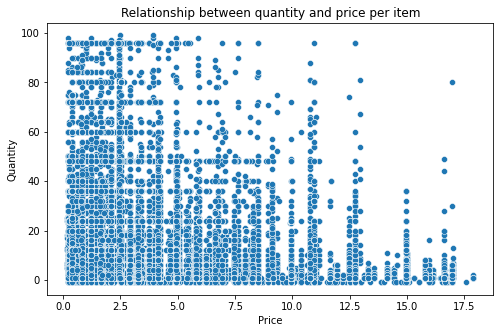

In [66]:
fig=plt.figure(figsize=(8,5))
sns.scatterplot(data=filtered_data, x="unitprice", y="quantity")
plt.title('Relationship between quantity and price per item')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

Now we see that the variance of each variable is much smaller, and there is a moderate negative relationship between quantity and price. For each increase of price by one unit size, the quantity decrease by 0.26 unit sizes. 
This relationship is logical since customers can buy more units of item if its' price is lower, and less units if the price is higher. Next, we will see if this correlation is steady over time.

In [67]:
corr_by_dt = filtered_data.groupby('month')[['quantity', 'unitprice']].corr().unstack()['quantity']['unitprice']
#corr_by_dt

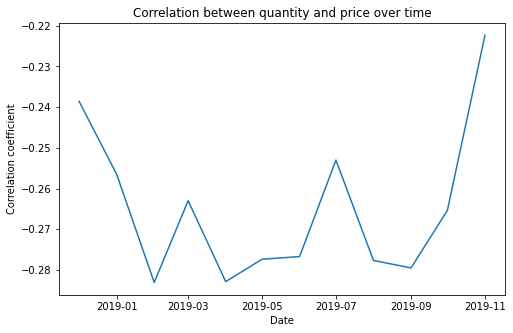

In [68]:
corr_by_dt = filtered_data.groupby('month')[['quantity', 'unitprice']].corr().unstack()['quantity']['unitprice']
fig=plt.figure(figsize=(8,5))
plt.plot(corr_by_dt.index.to_timestamp(), corr_by_dt.values)
plt.xlabel('Date')
plt.ylabel('Correlation coefficient')
plt.title('Correlation between quantity and price over time')
plt.show()

 The correaltion between quantity and price is always negative in our database but it is changing and varies from around -0.28 on February and April 19' to -0.24 on December 18' and even -0.22 on November 19'.
From October 19' we see a positive trend, that represents less negative relationship between the variables. Since we know that on November and December there are holidays and many sale days as Black Friday, Singles' Day and Christmes in which customers may be inclined to buy more items even if they are more expensive.
Now we will see if this assumption is true and customers indeed spend more on items in some months.
Since our data includes some items marked with the letter 'C' that may affect the result, we'll plot all the lines - the total, the 'C' marked invoices and those who don't together.

In [69]:
filtered_data['total']=filtered_data['quantity']*filtered_data['unitprice']

In [70]:
avg_total_by_mnth = filtered_data.groupby('month')['total'].mean()
avg_agg=avg_total_by_mnth.mean()

data_c = filtered_data.query('invoice_code=="C"').reset_index(drop=True)
avg_total_by_mnth_c = data_c.groupby('month')['total'].mean()
avg_agg_c=avg_total_by_mnth_c.mean()

data_wo_c = filtered_data.query('invoice_code!="C"').reset_index(drop=True)
avg_total_by_mnth_wo_c = data_wo_c.groupby('month')['total'].mean()
avg_agg_wo_c=avg_total_by_mnth_wo_c.mean()

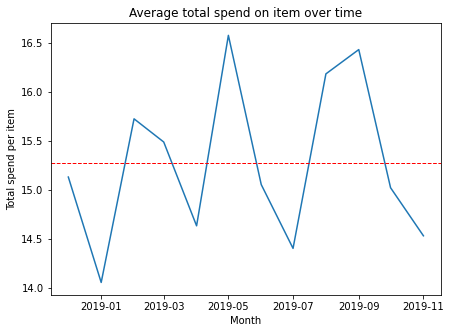

In [71]:
fig=plt.figure(figsize=(7,5))
plt.plot(avg_total_by_mnth.index.to_timestamp(), avg_total_by_mnth.values)
plt.xlabel('Month')
plt.ylabel('Total spend per item')
plt.title('Average total spend on item over time')
plt.axhline(y=avg_agg, color='r', linestyle='dashed', linewidth=1)

plt.show()

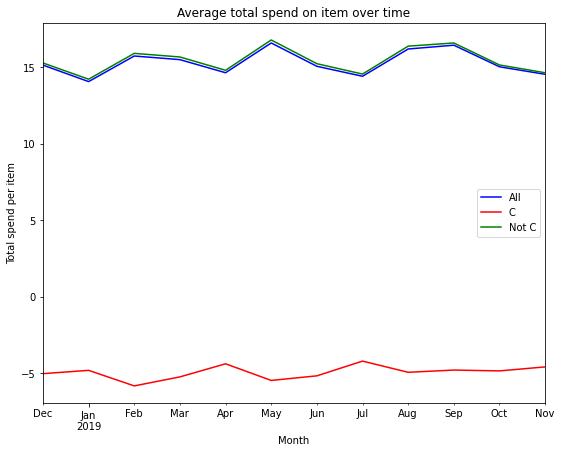

In [72]:
fig=plt.figure(figsize=(9,7))
avg_total_by_mnth.plot(kind='line', x='month', y='total', color='blue', label='All')
avg_total_by_mnth_c.plot(kind='line', x='month', y='total', color='red', label='C')
avg_total_by_mnth_wo_c.plot(kind='line', x='month', y='total', color='green', label='Not C')
plt.xlabel('Month')
plt.ylabel('Total spend per item')
plt.title('Average total spend on item over time')
plt.legend()
plt.show()

Customers spend in average 15.5 USD per item overall, but we see that this is changing through the year - on January, April, June, July, October and november 19' they spend a bit less; and on the other months they spend up to one dollar more per item type. When we take into account the different invoices and check how the 'C' marked items, that represent refunds or some discounts, may affect the results, we see almost reversed line between the red line and the blue and green ones. Based on the fact that the blue (all the data) and the green (items that werent marked with 'C') are similar in their patterns and very close to each other,we conclude that the 'C' group is not affecting the results that much and we can use the dataset as a whole.

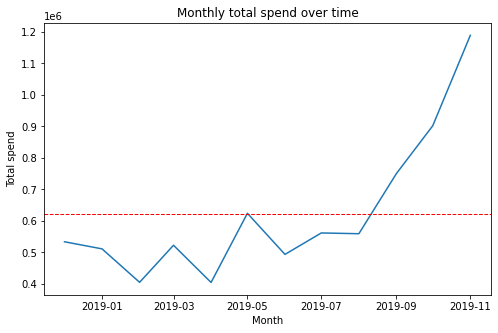

In [73]:
total_by_mnth = filtered_data.groupby('month')['total'].sum()
avg_total=total_by_mnth.mean()
fig=plt.figure(figsize=(8,5))
plt.plot(total_by_mnth.index.to_timestamp(), total_by_mnth.values)
plt.xlabel('Month')
plt.ylabel('Total spend')
plt.title('Monthly total spend over time')
plt.axhline(y=avg_total, color='r', linestyle='dashed', linewidth=1)
plt.show()

Overall, the monthly revenue is 621476 USD, while we can see that from August to November 2019 the revenue increases to a double amount that compensate on the total sums of the earlier months.

To sum up, we see that closer to the end of the year the negative correlation between quantity and price is getting smaller,the average spend on item is smaller, but the total monthly spend is higher. We suggest that the positive change in the negative correlation between the variables over time is not because customers buy more expensive items, or buy less cheap ones, but they simply buy bigger variety  and higher amounts of items that results in higher total spend. 

### Finding Best sellers and least selling items
We will create a list of all unique items with information about their quantity, price and total revenue in order to find the best and least sellers and the most profitable items.
Since we learned that the letters in the stock codes represent some variations in the item - like color or shape, we will ignore them and use the numerical code, in order to generalize our conclusions.

In [74]:
#creating series of stock_num and most frequent description
items = filtered_data.groupby('stock_num')['description'].apply(lambda x: x.value_counts().idxmax())

In [75]:
#checking duplicates
items[items.duplicated(keep=False)]

stock_num
10133     colouring pencils brown tube
10135     colouring pencils brown tube
20835    french lattice cushion cover 
20837     french floral cushion cover 
20838    french lattice cushion cover 
20840     french floral cushion cover 
40001      white bamboo ribs lampshade
40003      white bamboo ribs lampshade
47585    pink fairy cake cushion cover
47586    pink fairy cake cushion cover
72128           columbian candle round
72130           columbian candle round
72131       columbian candle rectangle
72133       columbian candle rectangle
79190          retro plastic 70's tray
79192          retro plastic 70's tray
79329    pink flock glass candleholder
79331    pink flock glass candleholder
79403              frosted white base 
79406              frosted white base 
84665    square cherry blossom cabinet
84666    square cherry blossom cabinet
Name: description, dtype: object

We see that the duplicates are only by description and not by the stock_num

In [76]:
#creating table with total quantity and revenue for each stock_num
item_quant_sales= filtered_data.groupby('stock_num').agg({'quantity':'sum', 'total':'sum'}).reset_index()
#item_quant_sales

In [77]:
#merging tables
items_df = item_quant_sales.merge(items, on='stock_num', how='left')
items_df

,stock_num,quantity,total,description
0,1,18,233.69,dotcomgiftshop gift voucher £20.00
1,2,0,0.00,carriage
2,3,4,9.94,boxed glass ashtray
3,4,1,16.63,haynes camper shoulder bag
4,69,1,15.79,ooh la la dogs collar
...,...,...,...,...
3247,90209,397,764.72,green enamel+glass hair comb
3248,90210,247,340.02,grey acrylic faceted bangle
3249,90211,19,112.47,diamond las vegas necklace 45cm
3250,90212,17,63.87,jet black las vegas bracelet round


In [78]:
#checking for duplicates
items_df[items_df.duplicated(keep=False)]

,stock_num,quantity,total,description


In [79]:
best_sell_15_items = items_df.sort_values(by='quantity', ascending=False).head(15)
#best_sell_15_items

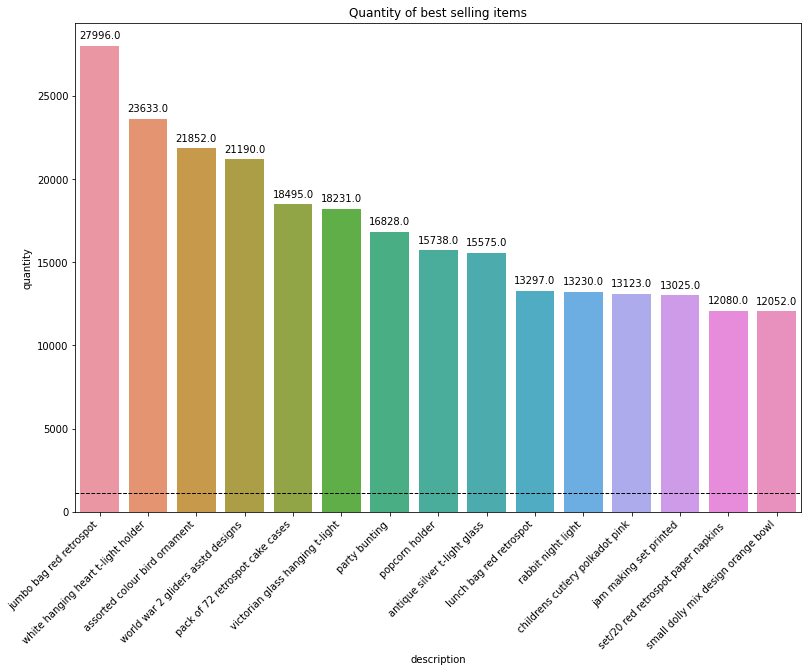

In [80]:
agg_quant=items_df['quantity'].mean()
fig= plt.subplots(figsize=(13, 9))
chart = sns.barplot(data=best_sell_15_items[['description', 'quantity']], x='description', y='quantity')
plt.title('Quantity of best selling items')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.axhline(y=agg_quant, color='k', linestyle='dashed', linewidth=1)
for p in chart.patches:
    chart.annotate("{:}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

In the plot above, the 15 most selling items are shown compared to a dashed line that represents the average quantity of all the products. 
All these products are much higher than the mean and we can see that there is also a big difference of almost twice the amount, between the best seller- Jumbo bag red retrospot which 27996 pieces of it were sold along this year, compared to the tenth item- Lunch bag red retrospot

In [81]:
worst_sell_15_items = items_df.sort_values(by='quantity', ascending=True).head(15)
#worst_sell_15_items

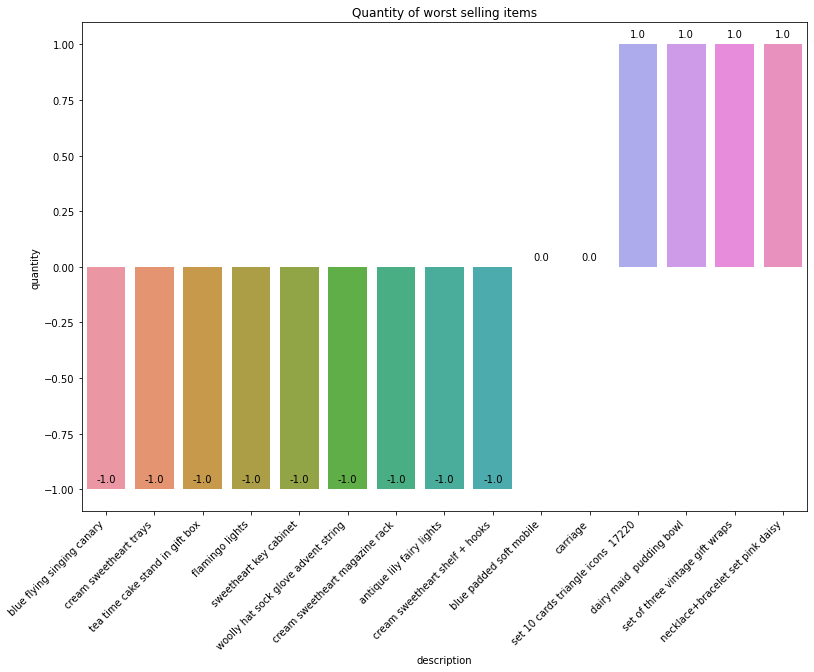

In [82]:
fig= plt.subplots(figsize=(13, 9))
chart = sns.barplot(data=worst_sell_15_items[['description', 'quantity']], x='description', y='quantity')
plt.title('Quantity of worst selling items')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
for p in chart.patches:
    chart.annotate("{:}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

Due to the filtering of the data from outliers we have minimum value of -1, all the first 11 items are products that show negative value for the store - they were sold less than they were returned or not sold at all, maybe because their quality is low or there is no demand for them. The store should consider if these products are worth the place they take on the shelves. 

In [83]:
profitable_15_items = items_df.sort_values(by='total', ascending=False).head(15)
#profitable_15_items

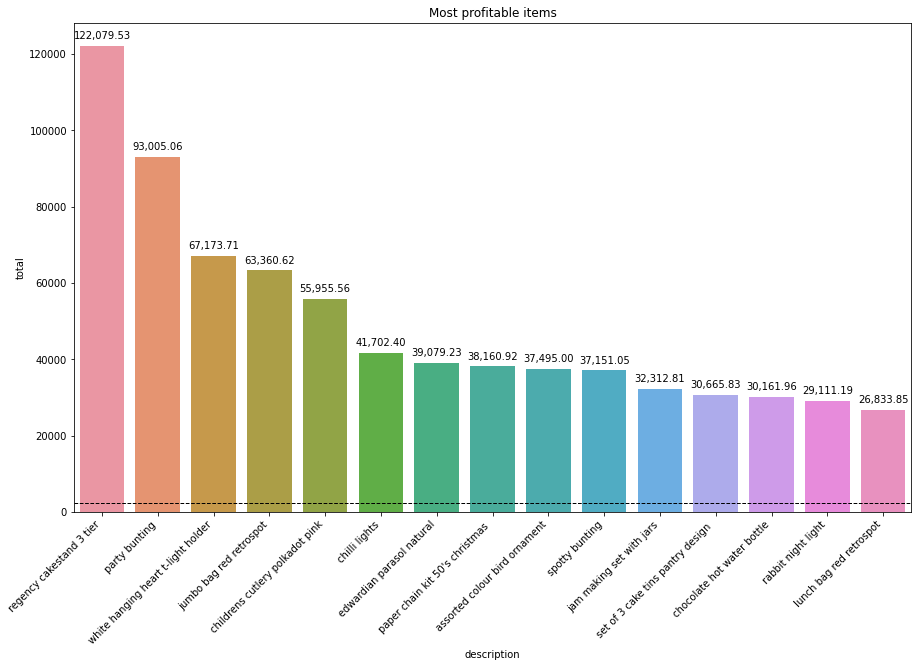

In [84]:
agg_revenue=items_df['total'].mean()
fig= plt.subplots(figsize=(15, 9))
chart = sns.barplot(data=profitable_15_items[['description', 'total']], x='description', y='total')
plt.title('Most profitable items')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.axhline(y=agg_revenue, color='k', linestyle='dashed', linewidth=1)
for p in chart.patches:
    chart.annotate("{:,.2f}".format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

Here we see the most profitable items, meaning that the sum of their revenue is the highest. In the first place we see a product that its' revenue is twice the value of the profits of the third selling product and interestingly - it wasn't included in the best selling items, meaning that although the store did not sell many pieces of it, its revenue is high - so we assume that its price is high enough that the multiplication of quantity and price resulted in 122,079 USD.
most of the next profitable products also were included in the 15 most selling items. Based on this result we suggest that it is important to look at the amount of pieces sold as an indication for successful products but in some cases there are products that customers are willing to pay more money for them, and then their revenue is compensating on the amount that is being sold. 

In [85]:
least_profitable_15_items = items_df.sort_values(by='total', ascending=True).head(15)
#least_profitable_15_items

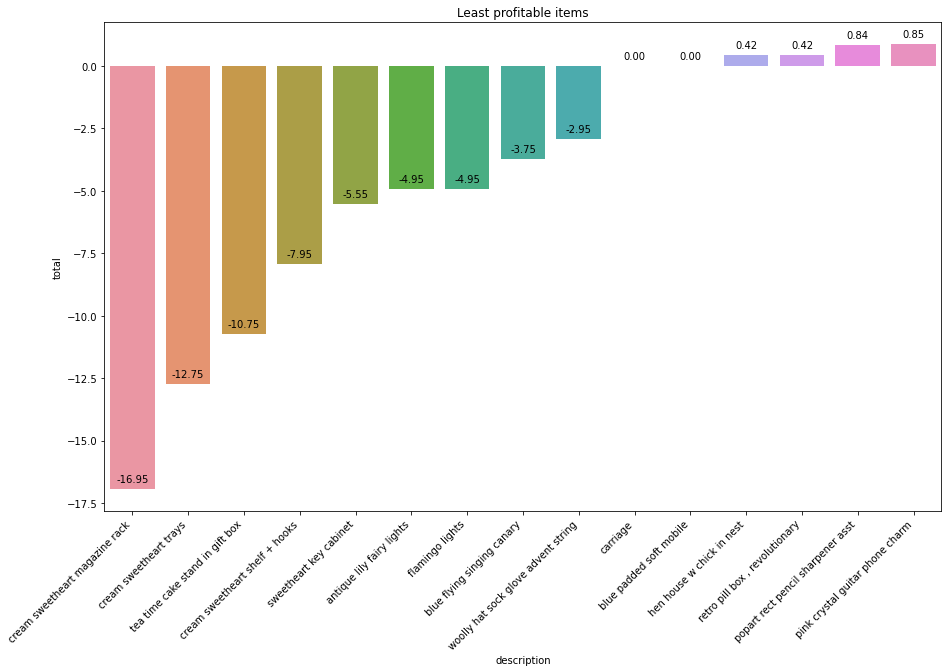

In [86]:
fig= plt.subplots(figsize=(15, 9))
chart = sns.barplot(data=least_profitable_15_items[['description', 'total']], x='description', y='total')
plt.title('Least profitable items')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
for p in chart.patches:
    chart.annotate("{:,.2f}".format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

Here we learn that an important thing to take into account when we check which products are the least successful is their price - if the item was returned more than purchased, its higher price become greater loss for the store.  

### Identify products that are being repurchased by customers
For the next analysis we will filter out rows with unidentified `customer_id`, since we want to relate items to customers' invoices. 

In [87]:
customer_data = filtered_data.dropna(subset=['customerid']).reset_index(drop=True)

In [88]:
round(customer_data.shape[0]/filtered_data.shape[0],2)

0.75

The filtered dataset includes 75% of the complete dataset, meaning its big enough to provide us general stable results.

In [89]:
#creating table with count of unique invoices in which the item was purchased by the customer
repurch_items=customer_data.groupby(['customerid', 'description'], as_index=False)['invoiceno'].nunique()
#filtering all the items that were bought once
repurch_items=repurch_items[repurch_items['invoiceno']>1].reset_index(drop=True)

In [90]:
repurch_agg=repurch_items.groupby('description', as_index=False)['invoiceno'].agg(['mean', 'sum']).rename(columns={'mean':'avg', 'sum':'total'})

In [91]:
repurch_agg.describe()

,avg,total
count,2848.000000,2848.000000
mean,2.695920,58.112008
std,0.821215,103.683154
min,2.000000,2.000000
25%,2.090909,6.000000
50%,2.555556,21.000000
75%,3.000000,63.000000
max,12.000000,1442.000000


In [92]:
most_repurch=repurch_agg.sort_values(by=['total'], ascending=False).head(15)

Items that are repurchased by customers are repurchased in average 2.7 times with a considerably small standard deviadvion of 0.82 times, the average invoices number in which the repurchased items are bought is 58 invoices but it varies and the maxim value is 1442 invoices. 

In [93]:
most_repurch['best_sellers'] = most_repurch.index.isin(best_sell_15_items['description'])
most_repurch['profitable'] = most_repurch.index.isin(profitable_15_items['description'])

In [94]:
def assign_status(row):
    if (row['best_sellers'] == True) & (row['profitable'] == True):
        return 'both'
    elif (row['best_sellers'] == True) & (row['profitable'] == False):
        return 'best_seller'
    elif (row['best_sellers'] == False) & (row['profitable'] == True):
        return 'profitable'
    elif (row['best_sellers'] == False) & (row['profitable'] == False):
        return 'none'
    else:
        return 'other'

In [95]:
# Apply function    
most_repurch['status']= most_repurch.apply(assign_status, axis=1)

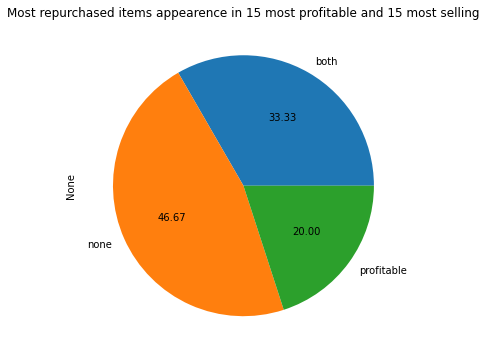

In [96]:
plt.figure(figsize=(12,6))
plt.title("Most repurchased items appearence in 15 most profitable and 15 most selling")
most_repurch.groupby('status').size().plot(kind='pie', autopct='%.2f')
plt.show()

We learn that almost half of the 15 repurchased items with highest counts of invoices - meaning that they many customers bought these items more than once; are items that do not appear in the 15 most profitable or 15 most selling items. From this we learn that there are items that many customers are used to buy frequently, and it may be worth selling and promoting them since customers are loyal and choose to buy them again and again.

In [97]:
highest_agg_repurch=repurch_agg.sort_values(by=['avg'], ascending=False).head(15)

In [98]:
highest_agg_repurch['best_sellers']=highest_agg_repurch.index.isin(best_sell_15_items['description'])
highest_agg_repurch['profitable']=highest_agg_repurch.index.isin(profitable_15_items['description'])

In [99]:
# Apply function    
highest_agg_repurch['status']= highest_agg_repurch.apply(assign_status, axis=1)
#highest_agg_repurch

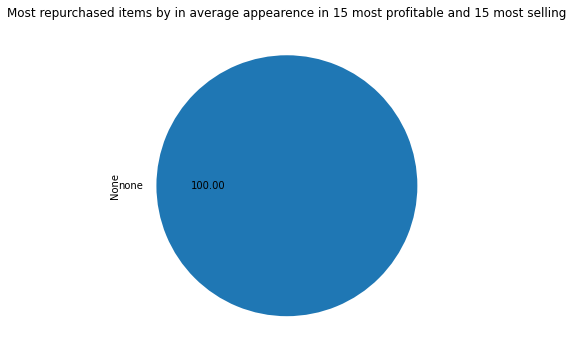

In [100]:
plt.figure(figsize=(12,6))
plt.title("Most repurchased items by in average appearence in 15 most profitable and 15 most selling")
highest_agg_repurch.groupby('status').size().plot(kind='pie', autopct='%.2f')
plt.show()

All items that are repurchased by customers in 7 to 12 times a year are not the most profitable or most selling. We suggest that this happens because these items are very popular by some loyal customers, that within a year, buy them in many different occasions, but this segment is small and the purchases do not affect the profitability or popularity metrics. 

### Identify products that are being co-purchased

In [101]:
"""
Based on this webpage:
https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106
"""
 
data_plus = filtered_data[filtered_data['quantity']>=0].reset_index(drop=True)

In [102]:
data_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486856 entries, 0 to 486855
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoiceno     486856 non-null  object        
 1   stockcode     486856 non-null  object        
 2   description   486856 non-null  object        
 3   quantity      486856 non-null  int64         
 4   invoicedate   486856 non-null  datetime64[ns]
 5   unitprice     486856 non-null  float64       
 6   customerid    365324 non-null  float64       
 7   invoice_code  0 non-null       object        
 8   stock_code    486856 non-null  object        
 9   stock_num     486443 non-null  Int64         
 10  date          486856 non-null  object        
 11  week          486856 non-null  UInt32        
 12  month         486856 non-null  period[M]     
 13  year          486856 non-null  int64         
 14  total         486856 non-null  float64       
dtypes: Int64(1), UInt

In [103]:
basket_plus = data_plus.groupby(['invoiceno', 'description'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('invoiceno')
basket_plus

description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,i love london mini rucksack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
invoiceno,,,,,,,,,,,,,,,,,,,,,
536847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We filtered out all the rows with negative quantity (that do not represent a purchase but an adjustment, refund, damages) and then created new table with all items as columns and all invoices as rows. Next we will change the values which now represent the quantity of the item purchased, to dichtomous value- 0 if the item wasnt purchased, 1 if it was.

In [104]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [105]:
encoded_basket_plus = basket_plus.applymap(encode_units)

In [106]:
filt_basket_plus = encoded_basket_plus[(encoded_basket_plus>0).sum(axis=1)>=2].reset_index(drop=True)

In [107]:
round(filt_basket_plus.shape[0]/encoded_basket_plus.shape[0],2)

0.93

93% of the invoices included more than one item type.
Next we will define frequently paired items as those bought 4% of the whole transaction and add a column of the times the item is bought.

In [108]:
freq_items = apriori(filt_basket_plus, min_support=0.04, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

In [109]:
freq_items['length']=freq_items['itemsets'].apply(lambda x: len(x))

In [110]:
from mlxtend.frequent_patterns import association_rules
association_rules(freq_items, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(roses regency teacup and saucer ),(green regency teacup and saucer),0.059721,0.057325,0.043242,0.724070,12.631007,0.039819,3.416362,0.979315
1,(green regency teacup and saucer),(roses regency teacup and saucer ),0.057325,0.059721,0.043242,0.754332,12.631007,0.039819,3.827444,0.976826
2,(jumbo bag red retrospot),(jumbo bag pink polkadot),0.106761,0.064512,0.043768,0.409962,6.354777,0.036880,1.585469,0.943351
3,(jumbo bag pink polkadot),(jumbo bag red retrospot),0.064512,0.106761,0.043768,0.678442,6.354777,0.036880,2.777848,0.900747


The highest association (lift value) is for Roses regency teacup and saucer with Green regency teacup and saucer, and between Jumbo bag pink polkadot with Jumbo bag red retrospot. We see that the dependence of each pair is equal, meaning that there is no one direction (item A and only then item B). Thus we will suggest the store to put discount like 1+1 on these items and increase the total invoice sum.  

## Test hypotheses

### The average order size,average purchase cost and daily total revenue in the weekends are higher than in the weekdays


In [111]:
#Adding column to identify weekend days and working days
filtered_data['weekday']=filtered_data['invoicedate'].dt.dayofweek
filtered_data['weekend']=filtered_data['weekday'].apply(lambda x: x >= 5)

In [112]:
weekend_data = filtered_data.query('weekend==True').reset_index(drop=True)
workday_data = filtered_data.query('weekend==False').reset_index(drop=True)

In [113]:
weekend_data.shape[0]

76436

In [114]:
workday_data.shape[0]

413985

#### Hypothesis:

H0- The average order sizes of invoices in workdays and invoices in weekend are the same 

H1- The average order sizes of invoices in workdays and invoices in weekend are not the same

In [115]:
quant_end = weekend_data.groupby('invoiceno', as_index=False)['quantity'].sum()
quant_work = workday_data.groupby('invoiceno', as_index=False)['quantity'].sum()

In [116]:
def testing_diff(A,B,alpha):
#checking normality
    stat1, p1_norm=st.shapiro(A)
    stat2, p2_norm=st.shapiro(B)
    if p1_norm > alpha and p2_norm>alpha:
        print('Failed to reject the null hypothesis: the distribution of the samples seems to be normal. To check if there is significant difference, a t-test will be used.')
        #Checking equality of variances
        statslev,p_levene=st.levene(A,B)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=st.ttest_ind(A, B,equal_var=False)
        else:
            statist,p_value=st.ttest_ind(A, B,equal_var=True) 
    else:
        print('Null hypothesis rejected: the distribution is not normal. To check if there is significant difference a non-parametric test will be used.')
        statist,p_value=st.mannwhitneyu(A, B)
    print(f'p-value:{round(p_value,2)}')
    if (p_value < alpha):
        print(f"Rejecting the null hypothesis: there is a significant difference between the conditions.")
    else:
        print(f"Failed to reject the null hypothesis: there is no reason to consider that there is a difference between the conditions")

In [117]:
testing_diff(A=quant_end['quantity'], B=quant_work['quantity'], alpha=0.05)

Null hypothesis rejected: the distribution is not normal. To check if there is significant difference a non-parametric test will be used.
p-value:0.19
Failed to reject the null hypothesis: there is no reason to consider that there is a difference between the conditions


#### Hypothesis:

H0- The average purchase cost of invoices in workdays and invoices in weekend are the same 

H1- The average purchase cost of invoices in workdays and invoices in weekend are not the same

In [118]:
total_end = weekend_data.groupby('invoiceno', as_index=False)['total'].sum()
total_work = workday_data.groupby('invoiceno', as_index=False)['total'].sum()

In [119]:
testing_diff(A=total_end['total'], B=total_work['total'], alpha=0.05)

Null hypothesis rejected: the distribution is not normal. To check if there is significant difference a non-parametric test will be used.
p-value:0.4
Failed to reject the null hypothesis: there is no reason to consider that there is a difference between the conditions


#### Hypothesis:

H0- The average daily revenues of invoices in workdays and invoices in weekend are the same 

H1- The average daily revenues of invoices in workdays and invoices in weekend are not the same

In [120]:
rev_end = weekend_data.groupby('date', as_index=False)['total'].sum()
rev_work = workday_data.groupby('date', as_index=False)['total'].sum()

In [121]:
testing_diff(A=rev_end['total'], B=rev_work['total'], alpha=0.05)

Null hypothesis rejected: the distribution is not normal. To check if there is significant difference a non-parametric test will be used.
p-value:0.43
Failed to reject the null hypothesis: there is no reason to consider that there is a difference between the conditions


In contrast to the assumption that customers spend more during the weekend - as we expected to see expressed in greater quantity, greater average purchase size, or greater total daily expense; we found no support to any of the hypothesis. Meaning that there is no significant difference between the amount of items bought, average purchse size or daily revenue.

### Seasonal products are more profitable than products sold throughout the year

We will devide the data to items that were sold all the year (12 months) and to those who weren't and compare the average item revenue.

#### Hypothesis:

H0- The average monthly revenue per item of items sold all year long are the same as the revenue of items sold in less than 12 months

H1- The average monthly revenue per item of items sold all year long are not the same as the revenue of items sold in less than 12 months


In [122]:
monthly_item_rev=filtered_data.groupby(['month', 'stock_num'], as_index=False)['total'].sum()

In [123]:
months_item_count = monthly_item_rev.groupby('stock_num')['month'].nunique()
sold_all_year = months_item_count[months_item_count == 12].index

all_year_items = monthly_item_rev[monthly_item_rev['stock_num'].isin(sold_all_year)].reset_index(drop=True)
monthly_items = monthly_item_rev[~monthly_item_rev['stock_num'].isin(sold_all_year)].reset_index(drop=True)

In [124]:
monthly_items.shape[0]

12384

In [125]:
all_year_items.shape[0]

15240

In [126]:
testing_diff(A=monthly_items['total'], B=all_year_items['total'], alpha=0.05)

Null hypothesis rejected: the distribution is not normal. To check if there is significant difference a non-parametric test will be used.
p-value:0.0
Rejecting the null hypothesis: there is a significant difference between the conditions.


In [127]:
print(f'Average revenue of items sold less than 12 months:{round(monthly_items.total.mean(),2)}.\nAverage revenue of items sold all year long:{round(all_year_items.total.mean(),2)}.')

Average revenue of items sold less than 12 months:197.79.
Average revenue of items sold all year long:328.21.


There is a significant difference in the average monthly revenue for items, when we compare items that were sold only few months to those sold all year. This signals that although we know that the sales are higher around November, it is not due to seasonal items (because we see that average revenue for regular items is significantly higher) but probably because customers buy more.

### Difference in average price between best selling and least selling items

We learned earlier that there is a negative relationship between quantity and price, and that not all the best selling items are also the most profitable (meaning that these items probably cost less). Now we will check the hypothesis that the best selling items are significantly cheaper than the least selling items.
Untill now we defined the least and best selling items as the lowest and highest 15 items in terms of quantity sold, but this amount is too small for the analysis, so we will define now the best and least selling items as those that are in the first and third quantiles. 

In [128]:
#calculating average unit price 
items_df['price']= items_df['total']/items_df['quantity']
items_df['price']=items_df['price'].fillna(0)

#### Hypothesis:

H0- The average price of best selling items is the same as the average price of least selling items

H1- The average price of best selling items is not the same as the average price of least selling items


In [129]:
Q1 = items_df['quantity'].quantile(0.25)
Q3 = items_df['quantity'].quantile(0.75)

In [130]:
best_quant = items_df[items_df['quantity']>=Q3].reset_index(drop=True)
least_quant = items_df[items_df['quantity']<=Q1].reset_index(drop=True)

In [131]:
best_quant.shape[0]

813

In [132]:
least_quant.shape[0]

817

In [133]:
testing_diff(A=best_quant['price'], B=least_quant['price'], alpha=0.05)

Null hypothesis rejected: the distribution is not normal. To check if there is significant difference a non-parametric test will be used.
p-value:0.0
Rejecting the null hypothesis: there is a significant difference between the conditions.


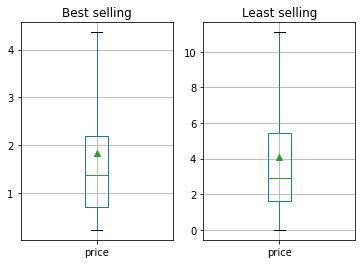

In [134]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax= best_quant[['price']].boxplot(showmeans=True,
                showbox=True, showfliers=False,ax=ax1)
least_quant[['price']].boxplot(showmeans=True,
           showbox=True, showfliers=False, ax=ax2)
ax1.set_title('Best selling')
ax2.set_title('Least selling')
plt.show()

The 25% highest items in terms of quantity sold are significantly different in their average price per unit, compared to the items with 25% lowest quantity values. We see that the best selling items are much lower in their average price (1.8) compared to the least selling (4.1). But is the average price significant also between most profitable and least profitable?

### Difference in average price between most and least profitable items

#### Hypothesis:

H0- The average price of most profitable items is the same as the average price of least profitable items

H1- The average price of most profitable items is not the same as the average price of least profitable items

In [135]:
Q1_profit = items_df['total'].quantile(0.25)
Q3_profit = items_df['total'].quantile(0.75)

In [136]:
best_profit = items_df[items_df['total']>=Q3].reset_index(drop=True)
least_profit = items_df[items_df['total']<=Q1].reset_index(drop=True)

In [137]:
testing_diff(A=best_profit['price'], B=least_profit['price'], alpha=0.05)

Null hypothesis rejected: the distribution is not normal. To check if there is significant difference a non-parametric test will be used.
p-value:0.0
Rejecting the null hypothesis: there is a significant difference between the conditions.


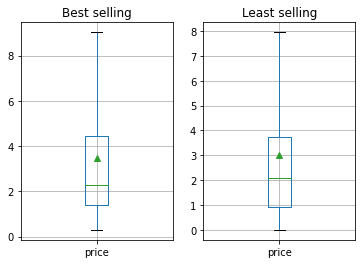

In [138]:
fig, (ax11, ax22) = plt.subplots(ncols=2)
ax= best_profit[['price']].boxplot(showmeans=True,
                showbox=True, showfliers=False,ax=ax11)
least_profit[['price']].boxplot(showmeans=True,
           showbox=True, showfliers=False, ax=ax22)
ax11.set_title('Best selling')
ax22.set_title('Least selling')
plt.show()

The 25% most profitable items  are significantly different in their average price per unit, compared to the 25% of items with lowest revenue values. But this time we see different picture - the average price of most profitable items (3.5) is higher than the average price for the least profitable items (3.02). Although the monetary difference is small, we see that lower price (like in the most selling items) does not nesecerilly signal rentability.

In [139]:
#filtered_data.to_csv('ecommerce_us_filtered.csv', index=False)

## Conclusions

The original data included 541909 rows of items bought in different invoice, we then changed datatypes, corrected wrong values, detected missing values and duplicates. 110 rows including missing description,customerid and unitprice, and invoices made before December 18' and after November 19' were filtered out in order to analyze high quality data on exectly one year long.
* There is a negative correlation between price and quantity, but it is changing over time and is less negative near the end of the year, close to the holidays.
* In average customers spend 15 USD per item type.
* The monthly total revenue of the store is higher almost twice in the last three months, compared to the months before.
We suggest that the positive change in the negative correlation between the variables over time is not because customers buy more expensive items, or buy less cheap ones, but they simply buy bigger variety and higher amounts of items that results in higher total spend.
Studying the items, we analyzed the best selling and least selling items, the most and least profitable, the items that are most often being repurchased in average and in total and the relationship between all these groups.
* The best selling items are mainly decoration items and bags, with Jumbo bag red retrospot as best seller, that was purchased 27996 times.
* The least selling items are those that were returned or refunded more times than they were sold.
* The most profitable item - Regency cakestand 3 tier, that its' revenue was 122,079 USD, and was twice higher than the third most profitable item, was not included in the best selling items. In contrast, most of the other profitable items were included in best selling list too.  
* Items that are repurchased by customers are repurchased in average 2.7 timesby each customer and in total are purchased in average in 58 different orders. Almost half of the 15 repurchased items with highest counts of invoices are items that do not appear in the 15 most profitable or 15 most selling items. 
* All items that are most often repurchased by same customers - in average 9 times a year, are not the most profitable or most selling.
There is an overlap between best sellers, most profitable items but its partial and it is not necessarily mean that the best sellers are the worthy - customers are willing to pay more on some items, these items are the most profitable for the store because they do not take many place and their revenue is high. Additionally, there are items that are popular by specific segments of customers that choose to buy them again and again in different occasions, since they satisfy a need for some sub-group of the customers, it is worth to sell them because loyal customers that come to buy them will buy more items in the same purchase. 
* The highest association is for Roses regency teacup and saucer with Green regency teacup and saucer, and between Jumbo bag pink polkadot with Jumbo bag red retrospot. We suggest to put discount like 1+1 on these items and increase the total invoice sum.
* No difference was found regarding the average order size, average purchase cost and daily total revenue between orders made on weekends and orders made on weekdays.
* There is a significant difference in the average monthly revenue for items between items that were sold only few months to items sold all year. Meaning that although the sales are higher around November, it is not due to seasonal items sold but probably because customers buy more.
* There is significant difference in average price per unit between the 25% most frequntly sold items and 25% least frequently sold. The best selling items are much lower in their average price (1.8) compared to the least selling (4.1). 
* There is a significant dofference in average price per unit between the 25% most profitable items and 25% least profitable items.The average price of most profitable items (3.5) is higher than the average price for the least profitable items (3.02). 

### Recommendations:
We recommend the store to analyze the least profitable and least selling items in order to check if it was due to low quality, low demand and consider taking them off the shelves.
Since we see that high quantity sold resulted many times in the highest total revenues for items we suggest to add more versions of these products. 
Further analysis is needed to identify more profitable items that weren't sold many times (meaning that the price per unit is high) and to offer small discounts in them - these discounts may convince customers that a sensitive to price but are willing to buy the products, to purchase them.
Additionaly, we suggest the store to store more information about its customers to learn if there are specific charectaristics that could help it to provide customized discounts and offers for customers with different needs - as we see in the analysis of the repurchased items. 